In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
pd.set_option('max_columns', None)

In [3]:
data = pd.read_csv("finaldatav2.csv")
dataframe2 = pd.read_csv("finaldatav2.csv")
dataframe3 = pd.read_csv("finaldatav2.csv")

In [4]:
data.head()

UNITID  TYPE  FORPROFIT  StudyAbroad  TUITVARY  ROOM  BOARD  \
0  100654     1          0            1         1     1      1   
1  100706     1          0            1         1     1      1   
2  100724     1          0            1         1     1      1   
3  100751     1          0            1         1     1      0   
4  100830     1          0            1         1     1      0   

   TUITION1_INDISTRICT_UG  FEE1_INDISTRICT_UG  TUITION2_INSTATE_UG  \
0                    8610                1414                 8610   
1                    9730                1608                 9730   
2                    8328                2740                 8328   
3                   10780                 840                10780   
4                    7992                 868                 7992   

   FEE2_INSTATE_UG  TUITION3_OUTSTATE_UG  FEE3_OUTOFSTATE_UG  \
0             1414                 17220                1414   
1             1608                 22126                1608   
2             2740                 16656                2740   
3              840                 30250                 840   
4              868                 17952                 868   

   INSTATE_TUITION_FEES_P  OUTSTATE_TUITION_FEES_P  OFFCAMPUS_SELF_EXP  \
0                   10024                    18634                3090   
1                   11338                    23734                4076   
2                   11068                    19396                4228   
3                   11620                    31090                4620   
4                    8860                    18820                3830   

   OFFCAMPUS_FAMILY_EXP  ADMS_REUIRED_GPA  ADMS_REQUIRED_COLLEGEPREP  \
0                  3440                 1                          0   
1                  4076                 1                          0   
2                  4228                 1                          0   
3                  5692                 1                          1   
4                  3830                 1                          0   

   NUM_APPS_ADMIT  NUM_FULLTIME_FALLCOHRT  FULLTIME_RETENTIONRATE_SPRING  \
0            9855                    1688                             54   
1            5793                    1489                             82   
2            7027                    1000                             62   
3           39560                    6734                             87   
4            4606                     602                             70   

   STUD_TO_FAL_RATIO  TOTAL_FIRSTYR_UG  PRCNT_FIRSTYR_UG  PRCNT_UG_AWARDEDAID  \
0                 18              1688                32                   87   
1                 19              1489                19                   72   
2                 15              1000                27                   93   
3                 20              6734                21                   67   
4                 16               602                13                   77   

   TOTAL_AID_UG  PRCNT_UG_AWARDED_PELL  TOTAL_AMOUNT_PELL_TOUG  \
0      45409382                     71                19916507   
1      58435613                     24                 8533685   
2      29288349                     74                13341998   
3     302907289                     17                26353781   
4      26325259                     47                11282206   

   PRCENT_FLOANS_TOUG  TOTAL_AMOUNT_FLOANS_UG  STATE      HLOFFER  \
0                  75                28131849  SOUTH  Highest_Doc   
1                  39                20051487  SOUTH  Highest_Doc   
2                  78                27329106  SOUTH  Highest_Doc   
3                  36                76675367  SOUTH  Highest_Doc   
4                  54                16818775  SOUTH  Highest_Doc   

   TOTAL_SALARY_FT_CONTRACT  DUAL_ENROLLMENT  AP_CREDIT  TEACHER_CERT  \
0             16,100,143.00                1          1             1   
1             27,356

In [5]:
data.shape

(1239, 51)

# Seperate Categorical and Numerical variables 

In [6]:
def seperate_colnames(dataframe):
    global catcols,numcols
    catcols = []
    numcols= []
    for item in dataframe:
        if item == "UNITID":
            continue
            #dummy variables and string values for levels 
        if dataframe[item].max() ==1 or dataframe[item].dtype ==object:
            catcols.append(item)
        else:
            numcols.append(item)
    print(numcols)
    print()
    print(catcols)

In [7]:
seperate_colnames(data)

['TUITION1_INDISTRICT_UG', 'FEE1_INDISTRICT_UG', 'TUITION2_INSTATE_UG', 'FEE2_INSTATE_UG', 'TUITION3_OUTSTATE_UG', 'FEE3_OUTOFSTATE_UG', 'INSTATE_TUITION_FEES_P', 'OUTSTATE_TUITION_FEES_P', 'OFFCAMPUS_SELF_EXP', 'OFFCAMPUS_FAMILY_EXP', 'NUM_APPS_ADMIT', 'NUM_FULLTIME_FALLCOHRT', 'FULLTIME_RETENTIONRATE_SPRING', 'STUD_TO_FAL_RATIO', 'TOTAL_FIRSTYR_UG', 'PRCNT_FIRSTYR_UG', 'PRCNT_UG_AWARDEDAID', 'TOTAL_AID_UG', 'PRCNT_UG_AWARDED_PELL', 'TOTAL_AMOUNT_PELL_TOUG', 'PRCENT_FLOANS_TOUG', 'TOTAL_AMOUNT_FLOANS_UG', 'TOTAL_SALARY_FT_CONTRACT', 'TOTAL_ASSETS', 'TOTAL_LIABILITIES', 'TOTAL_SPENT_ACADEMICSUPP', 'TOTAL_SPENT_STUDENTSS', 'TOTAL_PELL', 'STATEGRANT', 'LOCAL_GRANT', 'DISCOUNTSAPPLIED_TO_TUTFEES']

['TYPE', 'FORPROFIT', 'StudyAbroad', 'TUITVARY', 'ROOM', 'BOARD', 'ADMS_REUIRED_GPA', 'ADMS_REQUIRED_COLLEGEPREP', 'STATE', 'HLOFFER', 'DUAL_ENROLLMENT', 'AP_CREDIT', 'TEACHER_CERT', 'COUNSELING_SERVICES', 'EMPLOYMENT_SERVICE', 'ACADEMIC_LIBRARY', 'TUITION_GURANTEE', 'TUITION_PAYMENTPLAN', 'ATH

In [8]:
numcols = numcols

In [9]:
type(numcols)

list

# Numerical Data Frame Function

In [10]:
def numdf(dataframe):
    global numdata
    for col in dataframe.columns:
        if col not in numcols:
            col = col
            del dataframe[col]
    numdata = dataframe
    return dataframe.head()

# Categorical  Data Frame Function

In [11]:
def catdf(dataframe):
    global catdata
    for col in dataframe.columns:
        if col not in catcols:
            col = col
            del dataframe[col]
    catdata = dataframe
    return dataframe.head()

# Numerical Data frame

In [12]:
numdf(dataframe2)

TUITION1_INDISTRICT_UG  FEE1_INDISTRICT_UG  TUITION2_INSTATE_UG  \
0                    8610                1414                 8610   
1                    9730                1608                 9730   
2                    8328                2740                 8328   
3                   10780                 840                10780   
4                    7992                 868                 7992   

   FEE2_INSTATE_UG  TUITION3_OUTSTATE_UG  FEE3_OUTOFSTATE_UG  \
0             1414                 17220                1414   
1             1608                 22126                1608   
2             2740                 16656                2740   
3              840                 30250                 840   
4              868                 17952                 868   

   INSTATE_TUITION_FEES_P  OUTSTATE_TUITION_FEES_P  OFFCAMPUS_SELF_EXP  \
0                   10024                    18634                3090   
1                   11338                    23734                4076   
2                   11068                    19396                4228   
3                   11620                    31090                4620   
4                    8860                    18820                3830   

   OFFCAMPUS_FAMILY_EXP  NUM_APPS_ADMIT  NUM_FULLTIME_FALLCOHRT  \
0                  3440            9855                    1688   
1                  4076            5793                    1489   
2                  4228            7027                    1000   
3                  5692           39560                    6734   
4                  3830            4606                     602   

   FULLTIME_RETENTIONRATE_SPRING  STUD_TO_FAL_RATIO  TOTAL_FIRSTYR_UG  \
0                             54                 18              1688   
1                             82                 19              1489   
2                             62                 15              1000   
3                             87                 20              6734   
4                             70                 16               602   

   PRCNT_FIRSTYR_UG  PRCNT_UG_AWARDEDAID  TOTAL_AID_UG  PRCNT_UG_AWARDED_PELL  \
0                32                   87      45409382                     71   
1                19                   72      58435613                     24   
2                27                   93      29288349                     74   
3                21                   67     302907289                     17   
4                13                   77      26325259                     47   

   TOTAL_AMOUNT_PELL_TOUG  PRCENT_FLOANS_TOUG  TOTAL_AMOUNT_FLOANS_UG  \
0                19916507                  75                28131849   
1                 8533685                  39                20051487   
2                13341998                  78                27329106   
3                26353781                  36                76675367   
4                11282206                  54                16818775   

   TOTAL_SALARY_FT_CONTRACT  TOTAL_ASSETS  TOTAL_LIABILITIES  \
0             16,100,143.00     278440664          263028799   
1             27,356,289.00     521103730          418779906   
2             21,689,180.12     325537085          354313634   
3            125,001,923.00    4881510109         2542095875   
4             12,101,578.00     184716313          182619344   

   TOTAL_SPENT_ACADEMICSUPP  TOTAL_SPENT_STUDENTSS  TOTAL_PELL  STATEGRANT  \
0                   7257779               27527791    18427393      176182   
1                  12878882               20821717     9005275      109283   
2                  12928881               15714772    11454301      170200   
3                 103079114               60453485    27196901      772030   
4                   4592684                7303651    11011844      105571   

   LOCAL_GRANT  DISCOUNTSAPPLIED_TO_TUTFEES  
0            0                     22985068  
1            0                     501

# Categorical  Data frame

In [13]:
catdf(dataframe3)

TYPE  FORPROFIT  StudyAbroad  TUITVARY  ROOM  BOARD  ADMS_REUIRED_GPA  \
0     1          0            1         1     1      1                 1   
1     1          0            1         1     1      1                 1   
2     1          0            1         1     1      1                 1   
3     1          0            1         1     1      0                 1   
4     1          0            1         1     1      0                 1   

   ADMS_REQUIRED_COLLEGEPREP  STATE      HLOFFER  DUAL_ENROLLMENT  AP_CREDIT  \
0                          0  SOUTH  Highest_Doc                1          1   
1                          0  SOUTH  Highest_Doc                1          1   
2                          0  SOUTH  Highest_Doc                1          1   
3                          1  SOUTH  Highest_Doc                1          1   
4                          0  SOUTH  Highest_Doc                1          1   

   TEACHER_CERT  COUNSELING_SERVICES  EMPLOYMENT_SERVICE  ACADEMIC_LIBRARY  \
0             1                    1                   1                 1   
1             1                    1                   1                 1   
2             1                    1                   1                 1   
3             1                    1                   1                 1   
4             1                    1                   1                 1   

   TUITION_GURANTEE  TUITION_PAYMENTPLAN  ATHASSOC  
0                 0                    1         1  
1                 0                    1         1  
2                 0                    1         1  
3                 0                    1         1  
4                 0                    1         1

In [14]:
catdata.sum(axis=0)


TYPE                                                                       436
FORPROFIT                                                                  496
StudyAbroad                                                               1128
TUITVARY                                                                   427
ROOM                                                                      1235
BOARD                                                                      645
ADMS_REUIRED_GPA                                                          1093
ADMS_REQUIRED_COLLEGEPREP                                                  464
STATE                        SOUTHSOUTHSOUTHSOUTHSOUTHSOUTHSOUTHSOUTHSOUTHS...
HLOFFER                      Highest_DocHighest_DocHighest_DocHighest_DocHi...
DUAL_ENROLLMENT                                                           1150
AP_CREDIT                                                                 1204
TEACHER_CERT                                        

In [15]:
# Categorical columns dropping 

columns = [["StudyAbroad","ROOM","ADMS_REUIRED_GPA","DUAL_ENROLLMENT","AP_CREDIT","COUNSELING_SERVICES","EMPLOYMENT_SERVICE"
           "ACADEMIC_LIBRARY","TUITION_PAYMENTPLAN"]

# Coorelation 

<AxesSubplot:>

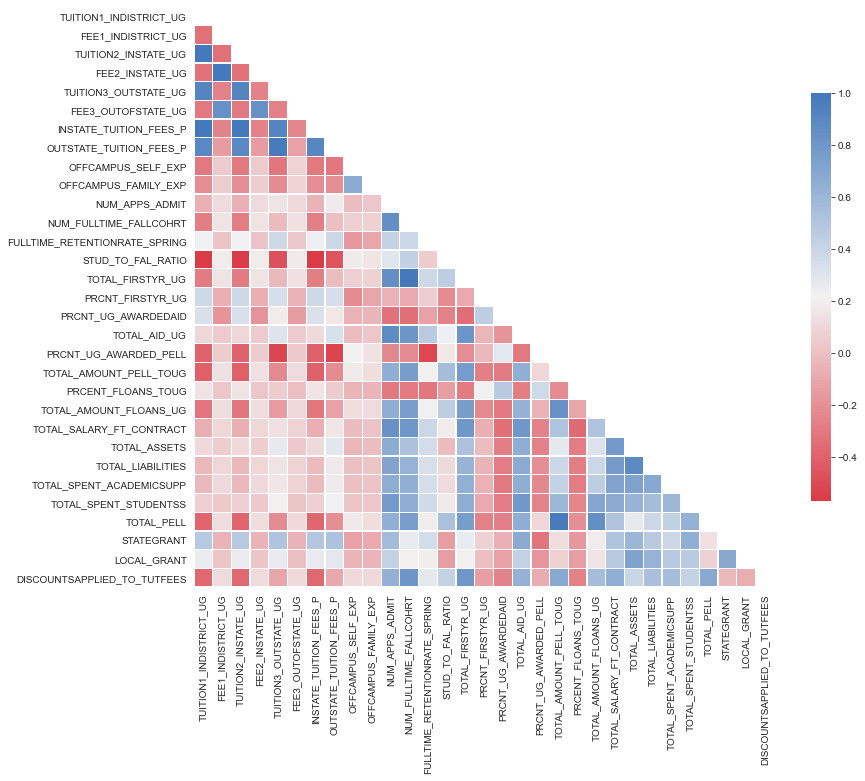

In [16]:
corr = numdata.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(13, 15))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.25, cbar_kws={"shrink": .5}, ax=ax)

# Find Colinear Columns
Suggested colinear columns to drop

In [17]:
cor_matrix=numdata.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.80)]
print(); print(to_drop)


['TUITION2_INSTATE_UG', 'FEE2_INSTATE_UG', 'TUITION3_OUTSTATE_UG', 'FEE3_OUTOFSTATE_UG', 'INSTATE_TUITION_FEES_P', 'OUTSTATE_TUITION_FEES_P', 'NUM_FULLTIME_FALLCOHRT', 'TOTAL_FIRSTYR_UG', 'TOTAL_AID_UG', 'TOTAL_AMOUNT_FLOANS_UG', 'TOTAL_SALARY_FT_CONTRACT', 'TOTAL_LIABILITIES', 'TOTAL_PELL', 'DISCOUNTSAPPLIED_TO_TUTFEES']


# Drop Colinear Columns 

In [18]:
def drop_colinear_cols():
    global data
    data = pd.read_csv("finaldata.csv")
    data.drop([col for col in ["StudyAbroad","ROOM","ADMS_REUIRED_GPA","DUAL_ENROLLMENT","AP_CREDIT",
                               "COUNSELING_SERVICES","EMPLOYMENT_SERVICE",
           "ACADEMIC_LIBRARY","TUITION_PAYMENTPLAN","ATHASSOC",
           'TUITION2_INSTATE_UG', 'FEE2_INSTATE_UG', 'TUITION3_OUTSTATE_UG', 
            'FEE3_OUTOFSTATE_UG', 'INSTATE_TUITION_FEES_P', 'OUTSTATE_TUITION_FEES_P', 
            'NUM_FULLTIME_FALLCOHRT', 'TOTAL_FIRSTYR_UG', 'TOTAL_AID_UG', 'TOTAL_AMOUNT_FLOANS_UG',
            'TOTAL_SALARY_FT_CONTRACT', 'TOTAL_LIABILITIES', 'TOTAL_PELL', 'DISCOUNTSAPPLIED_TO_TUTFEES']
               if col in data], axis=1, inplace=True)
    print("Name of Dataframe: data")
    return data.head()

In [19]:
drop_colinear_cols()

Name of Dataframe: data


UNITID  TYPE  FORPROFIT  TUITVARY  BOARD  TUITION1_INDISTRICT_UG  \
0  100654     1          0         1      1                    8610   
1  100706     1          0         1      1                    9730   
2  100724     1          0         1      1                    8328   
3  100751     1          0         1      0                   10780   
4  100830     1          0         1      0                    7992   

   FEE1_INDISTRICT_UG  OFFCAMPUS_SELF_EXP  OFFCAMPUS_FAMILY_EXP  \
0                1414                3090                  3440   
1                1608                4076                  4076   
2                2740                4228                  4228   
3                 840                4620                  5692   
4                 868                3830                  3830   

   ADMS_REQUIRED_COLLEGEPREP  NUM_APPS_ADMIT  FULLTIME_RETENTIONRATE_SPRING  \
0                          0            9855                             54   
1                          0            5793                             82   
2                          0            7027                             62   
3                          1           39560                             87   
4                          0            4606                             70   

   STUD_TO_FAL_RATIO  PRCNT_FIRSTYR_UG  PRCNT_UG_AWARDEDAID  \
0                 18                32                   87   
1                 19                19                   72   
2                 15                27                   93   
3                 20                21                   67   
4                 16                13                   77   

   PRCNT_UG_AWARDED_PELL  TOTAL_AMOUNT_PELL_TOUG  PRCENT_FLOANS_TOUG  \
0                     71                19916507                  75   
1                     24                 8533685                  39   
2                     74                13341998                  78   
3                     17                26353781                  36   
4                     47                11282206                  54   

   TEACHER_CERT  TUITION_GURANTEE  TOTAL_ASSETS  TOTAL_SPENT_ACADEMICSUPP  \
0             1                 0     278440664                   7257779   
1             1                 0     521103730                  12878882   
2             1                 0     325537085                  12928881   
3             1                 0    4881510109                 103079114   
4             1                 0     184716313                   4592684   

   TOTAL_SPENT_STUDENTSS  STATEGRANT  LOCAL_GRANT  Highest_Bachelor  \
0               27527791      176182            0                 0   
1               20821717      109283            0                 0   
2               15714772      170200            0                 0   
3               60453485      772030            0                 0   
4                7303651      105571            0                 0   

   STATE_SOUTH  
0            1  
1            1  
2            1  
3            1  
4            1

In [20]:
data.columns

Index(['UNITID', 'TYPE', 'FORPROFIT', 'TUITVARY', 'BOARD',
       'TUITION1_INDISTRICT_UG', 'FEE1_INDISTRICT_UG', 'OFFCAMPUS_SELF_EXP',
       'OFFCAMPUS_FAMILY_EXP', 'ADMS_REQUIRED_COLLEGEPREP', 'NUM_APPS_ADMIT',
       'FULLTIME_RETENTIONRATE_SPRING', 'STUD_TO_FAL_RATIO',
       'PRCNT_FIRSTYR_UG', 'PRCNT_UG_AWARDEDAID', 'PRCNT_UG_AWARDED_PELL',
       'TOTAL_AMOUNT_PELL_TOUG', 'PRCENT_FLOANS_TOUG', 'TEACHER_CERT',
       'TUITION_GURANTEE', 'TOTAL_ASSETS', 'TOTAL_SPENT_ACADEMICSUPP',
       'TOTAL_SPENT_STUDENTSS', 'STATEGRANT', 'LOCAL_GRANT',
       'Highest_Bachelor', 'STATE_SOUTH'],
      dtype='object')

In [21]:
print(data.shape)

(1240, 27)


In [22]:
data.columns

Index(['UNITID', 'TYPE', 'FORPROFIT', 'TUITVARY', 'BOARD',
       'TUITION1_INDISTRICT_UG', 'FEE1_INDISTRICT_UG', 'OFFCAMPUS_SELF_EXP',
       'OFFCAMPUS_FAMILY_EXP', 'ADMS_REQUIRED_COLLEGEPREP', 'NUM_APPS_ADMIT',
       'FULLTIME_RETENTIONRATE_SPRING', 'STUD_TO_FAL_RATIO',
       'PRCNT_FIRSTYR_UG', 'PRCNT_UG_AWARDEDAID', 'PRCNT_UG_AWARDED_PELL',
       'TOTAL_AMOUNT_PELL_TOUG', 'PRCENT_FLOANS_TOUG', 'TEACHER_CERT',
       'TUITION_GURANTEE', 'TOTAL_ASSETS', 'TOTAL_SPENT_ACADEMICSUPP',
       'TOTAL_SPENT_STUDENTSS', 'STATEGRANT', 'LOCAL_GRANT',
       'Highest_Bachelor', 'STATE_SOUTH'],
      dtype='object')

In [23]:
data.head()

UNITID  TYPE  FORPROFIT  TUITVARY  BOARD  TUITION1_INDISTRICT_UG  \
0  100654     1          0         1      1                    8610   
1  100706     1          0         1      1                    9730   
2  100724     1          0         1      1                    8328   
3  100751     1          0         1      0                   10780   
4  100830     1          0         1      0                    7992   

   FEE1_INDISTRICT_UG  OFFCAMPUS_SELF_EXP  OFFCAMPUS_FAMILY_EXP  \
0                1414                3090                  3440   
1                1608                4076                  4076   
2                2740                4228                  4228   
3                 840                4620                  5692   
4                 868                3830                  3830   

   ADMS_REQUIRED_COLLEGEPREP  NUM_APPS_ADMIT  FULLTIME_RETENTIONRATE_SPRING  \
0                          0            9855                             54   
1                          0            5793                             82   
2                          0            7027                             62   
3                          1           39560                             87   
4                          0            4606                             70   

   STUD_TO_FAL_RATIO  PRCNT_FIRSTYR_UG  PRCNT_UG_AWARDEDAID  \
0                 18                32                   87   
1                 19                19                   72   
2                 15                27                   93   
3                 20                21                   67   
4                 16                13                   77   

   PRCNT_UG_AWARDED_PELL  TOTAL_AMOUNT_PELL_TOUG  PRCENT_FLOANS_TOUG  \
0                     71                19916507                  75   
1                     24                 8533685                  39   
2                     74                13341998                  78   
3                     17                26353781                  36   
4                     47                11282206                  54   

   TEACHER_CERT  TUITION_GURANTEE  TOTAL_ASSETS  TOTAL_SPENT_ACADEMICSUPP  \
0             1                 0     278440664                   7257779   
1             1                 0     521103730                  12878882   
2             1                 0     325537085                  12928881   
3             1                 0    4881510109                 103079114   
4             1                 0     184716313                   4592684   

   TOTAL_SPENT_STUDENTSS  STATEGRANT  LOCAL_GRANT  Highest_Bachelor  \
0               27527791      176182            0                 0   
1               20821717      109283            0                 0   
2               15714772      170200            0                 0   
3               60453485      772030            0                 0   
4                7303651      105571            0                 0   

   STATE_SOUTH  
0            1  
1            1  
2            1  
3            1  
4            1

In [24]:
data.shape

(1240, 27)

In [25]:
print(np.corrcoef(data["TUITION1_INDISTRICT_UG"],data["TYPE"]))
print(np.corrcoef(data["TUITION1_INDISTRICT_UG"],data["TUITVARY"]))
print(np.corrcoef(data["TYPE"],data["TUITVARY"]))

[[ 1.         -0.77129441]
 [-0.77129441  1.        ]]
[[ 1.         -0.73996671]
 [-0.73996671  1.        ]]
[[1.         0.96635919]
 [0.96635919 1.        ]]


# Dropping more columns 

Private universities have fixed tution for out of state students 

In [26]:
data.drop("TUITVARY",axis=1,inplace=True)

<AxesSubplot:>

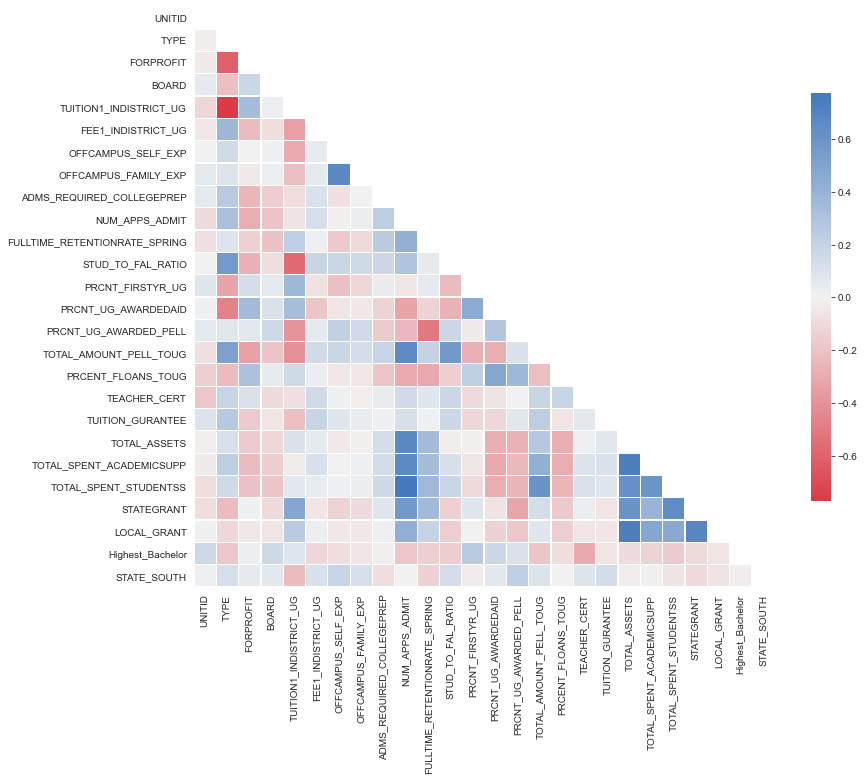

In [27]:
corr = data.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(13, 15))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.25, cbar_kws={"shrink": .5}, ax=ax)

In [28]:
cor_matrix=data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.80)]
print(); print(to_drop)


[]


# VIF 

In [29]:
#outputted data frame so far
data_b4_vif = pd.read_csv("data_before_vi.csv")
data_b4_vif.drop("Unnamed: 0",axis=1,inplace=True)

In [30]:
data_b4_vif.head()

UNITID  TYPE  FORPROFIT  BOARD  TUITION1_INDISTRICT_UG  FEE1_INDISTRICT_UG  \
0  100654     1          0      1                    8610                1414   
1  100706     1          0      1                    9730                1608   
2  100724     1          0      1                    8328                2740   
3  100751     1          0      0                   10780                 840   
4  100830     1          0      0                    7992                 868   

   OFFCAMPUS_SELF_EXP  OFFCAMPUS_FAMILY_EXP  ADMS_REQUIRED_COLLEGEPREP  \
0                3090                  3440                          0   
1                4076                  4076                          0   
2                4228                  4228                          0   
3                4620                  5692                          1   
4                3830                  3830                          0   

   NUM_APPS_ADMIT  FULLTIME_RETENTIONRATE_SPRING  STUD_TO_FAL_RATIO  \
0            9855                             54                 18   
1            5793                             82                 19   
2            7027                             62                 15   
3           39560                             87                 20   
4            4606                             70                 16   

   PRCNT_FIRSTYR_UG  PRCNT_UG_AWARDEDAID  PRCNT_UG_AWARDED_PELL  \
0                32                   87                     71   
1                19                   72                     24   
2                27                   93                     74   
3                21                   67                     17   
4                13                   77                     47   

   TOTAL_AMOUNT_PELL_TOUG  PRCENT_FLOANS_TOUG  STATE      HLOFFER  \
0                19916507                  75  SOUTH  Highest_Doc   
1                 8533685                  39  SOUTH  Highest_Doc   
2                13341998                  78  SOUTH  Highest_Doc   
3                26353781                  36  SOUTH  Highest_Doc   
4                11282206                  54  SOUTH  Highest_Doc   

   TEACHER_CERT  TUITION_GURANTEE  TOTAL_ASSETS  TOTAL_SPENT_ACADEMICSUPP  \
0             1                 0     278440664                   7257779   
1             1                 0     521103730                  12878882   
2             1                 0     325537085                  12928881   
3             1                 0    4881510109                 103079114   
4             1                 0     184716313                   4592684   

   TOTAL_SPENT_STUDENTSS  STATEGRANT  LOCAL_GRANT  
0               27527791      176182            0  
1               20821717      109283            0  
2               15714772      170200            0  
3               60453485      772030            0  
4                7303651      105571            0

# Removing dependent variable and only using predictors
VIF is affected by the predictors in it
Seperating into  different data when removing any predictors

In [31]:
data_b4_vif = data_b4_vif.drop(["FULLTIME_RETENTIONRATE_SPRING","UNITID"],axis=1,inplace=False)

In [32]:
data_b4_vif.columns

Index(['TYPE', 'FORPROFIT', 'BOARD', 'TUITION1_INDISTRICT_UG',
       'FEE1_INDISTRICT_UG', 'OFFCAMPUS_SELF_EXP', 'OFFCAMPUS_FAMILY_EXP',
       'ADMS_REQUIRED_COLLEGEPREP', 'NUM_APPS_ADMIT', 'STUD_TO_FAL_RATIO',
       'PRCNT_FIRSTYR_UG', 'PRCNT_UG_AWARDEDAID', 'PRCNT_UG_AWARDED_PELL',
       'TOTAL_AMOUNT_PELL_TOUG', 'PRCENT_FLOANS_TOUG', 'STATE', 'HLOFFER',
       'TEACHER_CERT', 'TUITION_GURANTEE', 'TOTAL_ASSETS',
       'TOTAL_SPENT_ACADEMICSUPP', 'TOTAL_SPENT_STUDENTSS', 'STATEGRANT',
       'LOCAL_GRANT'],
      dtype='object')

In [33]:
data_b4_vif.head()

TYPE  FORPROFIT  BOARD  TUITION1_INDISTRICT_UG  FEE1_INDISTRICT_UG  \
0     1          0      1                    8610                1414   
1     1          0      1                    9730                1608   
2     1          0      1                    8328                2740   
3     1          0      0                   10780                 840   
4     1          0      0                    7992                 868   

   OFFCAMPUS_SELF_EXP  OFFCAMPUS_FAMILY_EXP  ADMS_REQUIRED_COLLEGEPREP  \
0                3090                  3440                          0   
1                4076                  4076                          0   
2                4228                  4228                          0   
3                4620                  5692                          1   
4                3830                  3830                          0   

   NUM_APPS_ADMIT  STUD_TO_FAL_RATIO  PRCNT_FIRSTYR_UG  PRCNT_UG_AWARDEDAID  \
0            9855                 18                32                   87   
1            5793                 19                19                   72   
2            7027                 15                27                   93   
3           39560                 20                21                   67   
4            4606                 16                13                   77   

   PRCNT_UG_AWARDED_PELL  TOTAL_AMOUNT_PELL_TOUG  PRCENT_FLOANS_TOUG  STATE  \
0                     71                19916507                  75  SOUTH   
1                     24                 8533685                  39  SOUTH   
2                     74                13341998                  78  SOUTH   
3                     17                26353781                  36  SOUTH   
4                     47                11282206                  54  SOUTH   

       HLOFFER  TEACHER_CERT  TUITION_GURANTEE  TOTAL_ASSETS  \
0  Highest_Doc             1                 0     278440664   
1  Highest_Doc             1                 0     521103730   
2  Highest_Doc             1                 0     325537085   
3  Highest_Doc             1                 0    4881510109   
4  Highest_Doc             1                 0     184716313   

   TOTAL_SPENT_ACADEMICSUPP  TOTAL_SPENT_STUDENTSS  STATEGRANT  LOCAL_GRANT  
0                   7257779               27527791      176182            0  
1                  12878882               20821717      109283            0  
2                  12928881               15714772      170200            0  
3                 103079114               60453485      772030            0  
4                   4592684                7303651      105571            0

In [34]:
seperate_colnames(data_b4_vif)
numdf(data_b4_vif)

['TUITION1_INDISTRICT_UG', 'FEE1_INDISTRICT_UG', 'OFFCAMPUS_SELF_EXP', 'OFFCAMPUS_FAMILY_EXP', 'NUM_APPS_ADMIT', 'STUD_TO_FAL_RATIO', 'PRCNT_FIRSTYR_UG', 'PRCNT_UG_AWARDEDAID', 'PRCNT_UG_AWARDED_PELL', 'TOTAL_AMOUNT_PELL_TOUG', 'PRCENT_FLOANS_TOUG', 'TOTAL_ASSETS', 'TOTAL_SPENT_ACADEMICSUPP', 'TOTAL_SPENT_STUDENTSS', 'STATEGRANT', 'LOCAL_GRANT']

['TYPE', 'FORPROFIT', 'BOARD', 'ADMS_REQUIRED_COLLEGEPREP', 'STATE', 'HLOFFER', 'TEACHER_CERT', 'TUITION_GURANTEE']


TUITION1_INDISTRICT_UG  FEE1_INDISTRICT_UG  OFFCAMPUS_SELF_EXP  \
0                    8610                1414                3090   
1                    9730                1608                4076   
2                    8328                2740                4228   
3                   10780                 840                4620   
4                    7992                 868                3830   

   OFFCAMPUS_FAMILY_EXP  NUM_APPS_ADMIT  STUD_TO_FAL_RATIO  PRCNT_FIRSTYR_UG  \
0                  3440            9855                 18                32   
1                  4076            5793                 19                19   
2                  4228            7027                 15                27   
3                  5692           39560                 20                21   
4                  3830            4606                 16                13   

   PRCNT_UG_AWARDEDAID  PRCNT_UG_AWARDED_PELL  TOTAL_AMOUNT_PELL_TOUG  \
0                   87                     71                19916507   
1                   72                     24                 8533685   
2                   93                     74                13341998   
3                   67                     17                26353781   
4                   77                     47                11282206   

   PRCENT_FLOANS_TOUG  TOTAL_ASSETS  TOTAL_SPENT_ACADEMICSUPP  \
0                  75     278440664                   7257779   
1                  39     521103730                  12878882   
2                  78     325537085                  12928881   
3                  36    4881510109                 103079114   
4                  54     184716313                   4592684   

   TOTAL_SPENT_STUDENTSS  STATEGRANT  LOCAL_GRANT  
0               27527791      176182            0  
1               20821717      109283            0  
2               15714772      170200            0  
3               60453485      772030            0  
4                7303651      105571            0

In [35]:
numdata

TUITION1_INDISTRICT_UG  FEE1_INDISTRICT_UG  OFFCAMPUS_SELF_EXP  \
0                       8610                1414                3090   
1                       9730                1608                4076   
2                       8328                2740                4228   
3                      10780                 840                4620   
4                       7992                 868                3830   
...                      ...                 ...                 ...   
1234                   12000                 150                3800   
1235                    8500                 150                3800   
1236                    8500                 150                3800   
1237                    4776                 780                3466   
1238                   15025                 488                4788   

      OFFCAMPUS_FAMILY_EXP  NUM_APPS_ADMIT  STUD_TO_FAL_RATIO  \
0                     3440            9855                 18   
1                     4076            5793                 19   
2                     4228            7027                 15   
3                     5692           39560                 20   
4                     3830            4606                 16   
...                    ...             ...                ...   
1234                  5600              35                 12   
1235                  5600              40                 22   
1236                  5600              40                 27   
1237                  3466              85                 20   
1238                  4104           95321                 15   

      PRCNT_FIRSTYR_UG  PRCNT_UG_AWARDEDAID  PRCNT_UG_AWARDED_PELL  \
0                   32                   87                     71   
1                   19                   72                     24   
2                   27                   93                     74   
3                   21                   67                     17   
4                   13                   77                     47   
...                ...                  ...                    ...   
1234                32                   80                     59   
1235                22                   99                     61   
1236                43                   54                     38   
1237                19                   46                     23   
1238                21                   60                     22   

      TOTAL_AMOUNT_PELL_TOUG  PRCENT_FLOANS_TOUG  TOTAL_ASSETS  \
0                   19916507                  75     278440664   
1                    8533685                  39     521103730   
2                   13341998                  78     325537085   
3                   26353781                  36    4881510109   
4                   11282206                  54     184716313   
...                      ...                 ...           ...   
1234                  223850                   0       7154786   
1235                  484303                   0       1690872   
1236                  129212                   0       6778180   
1237                  202088                  22        934251   
1238                77461840                  47   17135593000   

      TOTAL_SPENT_ACADEMICSUPP  TOTAL_SPENT_STUDENTSS  STATEGRANT  LOCAL_GRANT  
0                      7257779               27527791      176182            0  
1                     12878882               20821717      109283            0  
2                     12928881               15714772      170200            0  
3                    103079114               60453485      772030            0  
4                      4592684                7303651      105571            0  
...                        ...                    ...         ...          ...  
1234                     81114                 643492      931387      1915391  
1235                      9870                 671452      544723      1428549

In [36]:
def vif_function(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i)
                          for i in range(len(dataframe.columns))]
    userinput = input("Do you want to display all columns VIF :")
    inputyes = ["Yes","yes","YES","Y","y"]
    inputno = ["N","n","No","NO"]
    if userinput in inputyes:
        pd.set_option('max_rows', None)
    else:
        pd.set_option("max_rows",20)
        pass
    print(vif_data)
    userinput2 = int(input("What is your Maximum VIF VALUE:"))
    valuesover = []
    for x, y in vif_data.iterrows():
        if (y[1]) >=userinput2:
            valuesover.append(y[0])
    return valuesover

In [37]:
vif_function(numdata)

Do you want to display all columns VIF :yes
                     feature   VIF
0     TUITION1_INDISTRICT_UG 10.04
1         FEE1_INDISTRICT_UG  2.58
2         OFFCAMPUS_SELF_EXP 10.51
3       OFFCAMPUS_FAMILY_EXP 10.36
4             NUM_APPS_ADMIT  7.22
5          STUD_TO_FAL_RATIO 14.44
6           PRCNT_FIRSTYR_UG 17.54
7        PRCNT_UG_AWARDEDAID 42.77
8      PRCNT_UG_AWARDED_PELL 12.66
9     TOTAL_AMOUNT_PELL_TOUG  4.99
10        PRCENT_FLOANS_TOUG 14.24
11              TOTAL_ASSETS  0.00
12  TOTAL_SPENT_ACADEMICSUPP  3.11
13     TOTAL_SPENT_STUDENTSS  5.74
14                STATEGRANT  5.84
15               LOCAL_GRANT -0.06
What is your Maximum VIF VALUE:10


['TUITION1_INDISTRICT_UG',
 'OFFCAMPUS_SELF_EXP',
 'OFFCAMPUS_FAMILY_EXP',
 'STUD_TO_FAL_RATIO',
 'PRCNT_FIRSTYR_UG',
 'PRCNT_UG_AWARDEDAID',
 'PRCNT_UG_AWARDED_PELL',
 'PRCENT_FLOANS_TOUG']

In [47]:
data_vif2 = data.drop(['TUITION1_INDISTRICT_UG',
 'OFFCAMPUS_SELF_EXP',
 'OFFCAMPUS_FAMILY_EXP',
 'STUD_TO_FAL_RATIO',
 'PRCNT_FIRSTYR_UG',
 'PRCNT_UG_AWARDEDAID',
 'PRCNT_UG_AWARDED_PELL',
 'PRCENT_FLOANS_TOUG'],axis=1,inplace=False)

In [49]:
data_vif2.shape

(1240, 43)

In [48]:
data_vif2.head()

UNITID  TYPE  FORPROFIT  StudyAbroad  TUITVARY  ROOM  BOARD  \
0  100654     1          0            1         1     1      1   
1  100706     1          0            1         1     1      1   
2  100724     1          0            1         1     1      1   
3  100751     1          0            1         1     1      0   
4  100830     1          0            1         1     1      0   

   FEE1_INDISTRICT_UG  TUITION2_INSTATE_UG  FEE2_INSTATE_UG  \
0                1414                 8610             1414   
1                1608                 9730             1608   
2                2740                 8328             2740   
3                 840                10780              840   
4                 868                 7992              868   

   TUITION3_OUTSTATE_UG  FEE3_OUTOFSTATE_UG  INSTATE_TUITION_FEES_P  \
0                 17220                1414                   10024   
1                 22126                1608                   11338   
2                 16656                2740                   11068   
3                 30250                 840                   11620   
4                 17952                 868                    8860   

   OUTSTATE_TUITION_FEES_P  ADMS_REUIRED_GPA  ADMS_REQUIRED_COLLEGEPREP  \
0                    18634                 1                          0   
1                    23734                 1                          0   
2                    19396                 1                          0   
3                    31090                 1                          1   
4                    18820                 1                          0   

   NUM_APPS_ADMIT  NUM_FULLTIME_FALLCOHRT  FULLTIME_RETENTIONRATE_SPRING  \
0            9855                    1688                             54   
1            5793                    1489                             82   
2            7027                    1000                             62   
3           39560                    6734                             87   
4            4606                     602                             70   

   TOTAL_FIRSTYR_UG  TOTAL_AID_UG  TOTAL_AMOUNT_PELL_TOUG  \
0              1688      45409382                19916507   
1              1489      58435613                 8533685   
2              1000      29288349                13341998   
3              6734     302907289                26353781   
4               602      26325259                11282206   

   TOTAL_AMOUNT_FLOANS_UG  TOTAL_SALARY_FT_CONTRACT  DUAL_ENROLLMENT  \
0                28131849             16,100,143.00                1   
1                20051487             27,356,289.00                1   
2                27329106             21,689,180.12                1   
3                76675367            125,001,923.00                1   
4                16818775             12,101,578.00                1   

   AP_CREDIT  TEACHER_CERT  COUNSELING_SERVICES  EMPLOYMENT_SERVICE  \
0          1             1                    1                   1   
1          1             1                    1                   1   
2          1             1                    1                   1   
3          1             1                    1                   1   
4          1             1                    1                   1   

   ACADEMIC_LIBRARY  TUITION_GURANTEE  TUITION_PAYMENTPLAN  ATHASSOC  \
0                 1                 0                    1         1   
1                 1                 0                    1         1   
2                 1                 0                    1         1   
3                 1                 0                    1         1   
4                 1                 0                    1         1   

   TOTAL_ASSETS  TOTAL_LIABILITIES  TOTAL_SPENT_ACADEMICSUPP  \
0     278440664          263028799                   7257779   
1     521103730          418779906                  12878882   
2     325537085          354313634      

<AxesSubplot:>

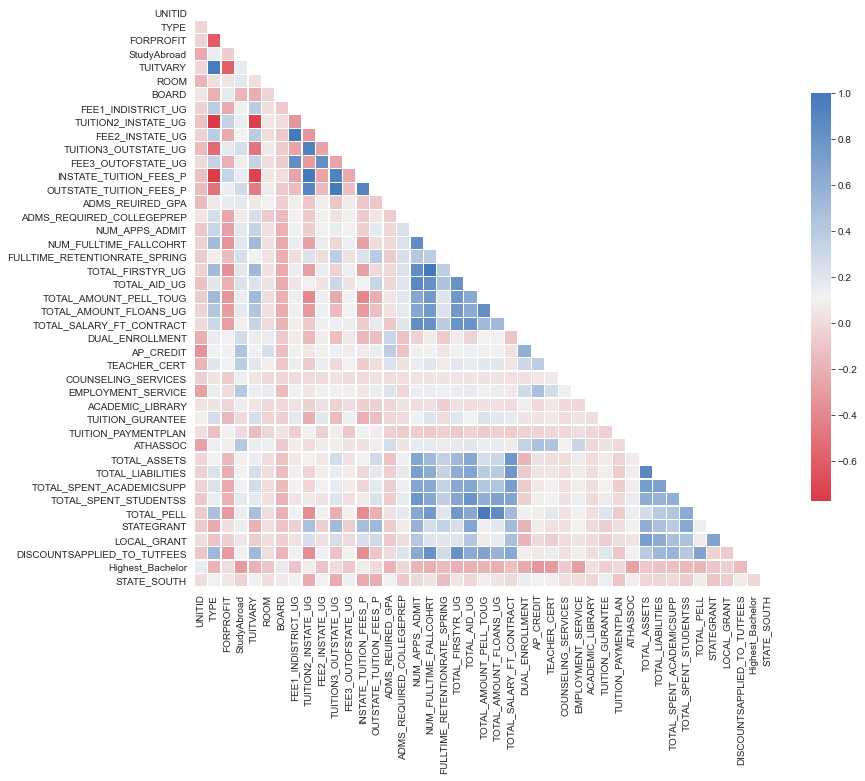

In [50]:
corr = data_vif2.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(13, 15))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.25, cbar_kws={"shrink": .5}, ax=ax)

# Predictors

* TYPE: 1 Public, 0 private
* FOR PROFIT: 1 For profit, 0 No
* BOARD: 1 offer board, 0 no
* FEE 1_INDISTRICT UG : In-district required fees for full-time undergraduates
* ADMS_REQUIRED COLLEGEPREP: 1 = Required college prep completion, 0 did not 
* NUM APPS_ADMIT: Number of Applicants admitted  
* TOTAL_AMOUNT_PELL_TOUG: Total amount of Pell Grants to UnderGraduates  
* Teacher cert: 1 = if offers teacher cert, 0 if not
* TUITION_GURANTEE: 1 = Guarantees Tution will not rise over course of years in collee, 0 NO
* TOTAL ASSETS = Total assets of university 
* TOTAL_SPEND_ACADEMICSS: Total spend on academic support
* TOTAL_SPEND_STUDENTSS: Total spent on student support services
* STATE GRANT:Total Grants by state gov
* LOCAL GRANT: Total grants by local gov 
* Highest_Bachelor: 1= if Highest level of education is bachelor degree, 0 if post bachelor or higher
  All universities are at least Bachelor 
* SOUTH: 1 = if state is in south region by U.S census bureu, 0 if elsewhere 

In [42]:
data_vif2.columns

Index(['UNITID', 'TYPE', 'FORPROFIT', 'BOARD', 'FEE1_INDISTRICT_UG',
       'ADMS_REQUIRED_COLLEGEPREP', 'NUM_APPS_ADMIT', 'TOTAL_AMOUNT_PELL_TOUG',
       'TEACHER_CERT', 'TUITION_GURANTEE', 'TOTAL_ASSETS',
       'TOTAL_SPENT_ACADEMICSUPP', 'TOTAL_SPENT_STUDENTSS', 'STATEGRANT',
       'LOCAL_GRANT', 'Highest_Bachelor', 'STATE_SOUTH'],
      dtype='object')

# Final Data Frame

In [43]:
data = pd.read_csv("finaldata.csv")
finaldata= data[['UNITID', 'TYPE', 'FORPROFIT', 'BOARD', 'FEE1_INDISTRICT_UG',
       'ADMS_REQUIRED_COLLEGEPREP', 'NUM_APPS_ADMIT', 'TOTAL_AMOUNT_PELL_TOUG',
       'TEACHER_CERT', 'TUITION_GURANTEE', 'TOTAL_ASSETS',
       'TOTAL_SPENT_ACADEMICSUPP', 'TOTAL_SPENT_STUDENTSS', 'STATEGRANT',
       'LOCAL_GRANT', 'Highest_Bachelor', 'STATE_SOUTH',"FULLTIME_RETENTIONRATE_SPRING"]]

In [44]:
finaldata.head(10)

UNITID  TYPE  FORPROFIT  BOARD  FEE1_INDISTRICT_UG  \
0  100654     1          0      1                1414   
1  100706     1          0      1                1608   
2  100724     1          0      1                2740   
3  100751     1          0      0                 840   
4  100830     1          0      0                 868   
5  100858     1          0      0                1716   
6  100937     0          1      0                1250   
7  101189     0          1      1                1990   
8  101435     0          1      1                1489   
9  101480     1          0      0                1400   

   ADMS_REQUIRED_COLLEGEPREP  NUM_APPS_ADMIT  TOTAL_AMOUNT_PELL_TOUG  \
0                          0            9855                19916507   
1                          0            5793                 8533685   
2                          0            7027                13341998   
3                          1           39560                26353781   
4                          0            4606                11282206   
5                          1           17946                15631504   
6                          0            2460                 1313515   
7                          0            1572                 5075304   
8                          0            2129                 1902219   
9                          0           10932                15284630   

   TEACHER_CERT  TUITION_GURANTEE  TOTAL_ASSETS  TOTAL_SPENT_ACADEMICSUPP  \
0             1                 0     278440664                   7257779   
1             1                 0     521103730                  12878882   
2             1                 0     325537085                  12928881   
3             1                 0    4881510109                 103079114   
4             1                 0     184716313                   4592684   
5             1                 0    3845168598                 144933734   
6             1                 0     150253116                   3760960   
7             1                 0      91818974                   2773551   
8             1                 1      90105209                   2197449   
9             1                 0     381479000                   8930333   

   TOTAL_SPENT_STUDENTSS  STATEGRANT  LOCAL_GRANT  Highest_Bachelor  \
0               27527791      176182            0                 0   
1               20821717      109283            0                 0   
2               15714772      170200            0                 0   
3               60453485      772030            0                 0   
4                7303651      105571            0                 0   
5               38623385       84512        10345                 0   
6                8950139    10878745     44619283                 1   
7                9018481    12599710     43624987                 0   
8                6536882    10696399     23465278                 1   
9               22832049           0            0                 0   

   STATE_SOUTH  FULLTIME_RETENTIONRATE_SPRING  
0            1                             54  
1            1                             82  
2            1                             62  
3            1                             87  
4            1                             70  
5            1                             92  
6            1                             80  
7            1                             60  
8            1                             70  
9            1                             73

In [45]:
finaldata.shape

(1240, 18)

In [46]:
#finaldata.to_csv("datamodel.csv")